# Harrison Oates 5508 Assignment 1
CITS5508 - Harrison Oates (22966832)

## 1 - Binary classification
---

### 1.1 Raw Data Loading and Imports
- both the testing and training sets are loaded in from the testing.csv and training.csv files, the first 5 rows of these datasets along with their infos are printed to ensure that the loaded datasets match what was seen in the csv file.
- the datasets then have the columns that start with 'pred_minus_obs' removed and the resulting info printed to ensure the only remaining classes are b1-b9

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve, accuracy_score, f1_score, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import SVC


testing = pd.read_csv("testing.csv")
training = pd.read_csv("training.csv")

print("Testing Data Info\n")
print(testing.info())

print("\n First 5 Rows of Testing Data \n")
print(testing.head(5))

print("\n Training Data Info\n")
print(training.info())

print("\n First 5 Rows of Training Data \n")
print(training.head(5))

Testing Data Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   class                198 non-null    object 
 1   b1                   198 non-null    int64  
 2   b2                   198 non-null    int64  
 3   b3                   198 non-null    int64  
 4   b4                   198 non-null    int64  
 5   b5                   198 non-null    int64  
 6   b6                   198 non-null    int64  
 7   b7                   198 non-null    int64  
 8   b8                   198 non-null    int64  
 9   b9                   198 non-null    int64  
 10  pred_minus_obs_H_b1  198 non-null    float64
 11  pred_minus_obs_H_b2  198 non-null    float64
 12  pred_minus_obs_H_b3  198 non-null    float64
 13  pred_minus_obs_H_b4  198 non-null    float64
 14  pred_minus_obs_H_b5  198 non-null    float64
 15  pred_minus_obs_H_b6  

In [29]:
#remove the columns that start with pred_minus_obs
train_data = training.loc[:, ~training.columns.str.startswith("pred_minus_obs")]
test_data = testing.loc[:, ~testing.columns.str.startswith("pred_minus_obs")]

#check to see that the only features remaining is b1-b9
print("Training Data Info Post Filtering \n")
print(train_data.info())

print("\n Testing Data Info Post Filtering \n")
print(test_data.info())

Training Data Info Post Filtering 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   325 non-null    object
 1   b1      325 non-null    int64 
 2   b2      325 non-null    int64 
 3   b3      325 non-null    int64 
 4   b4      325 non-null    int64 
 5   b5      325 non-null    int64 
 6   b6      325 non-null    int64 
 7   b7      325 non-null    int64 
 8   b8      325 non-null    int64 
 9   b9      325 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 25.5+ KB
None

 Testing Data Info Post Filtering 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   198 non-null    object
 1   b1      198 non-null    int64 
 2   b2      198 non-null    int64 
 3   b3      198 non-null    int64 
 4   b4      

### 1.2 - Plots of Raw Data
---
- The below plots show that there is a clear imbalance in our training and testing sets with a large discrepancy in the feature counts between data sets
- Despit the imbalance between our training and testing sets the mean for each class seems to be close to consistent for both training and testing sets but fluctuates wildly

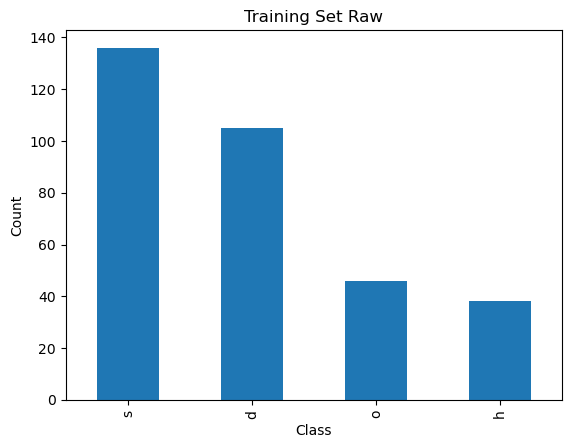

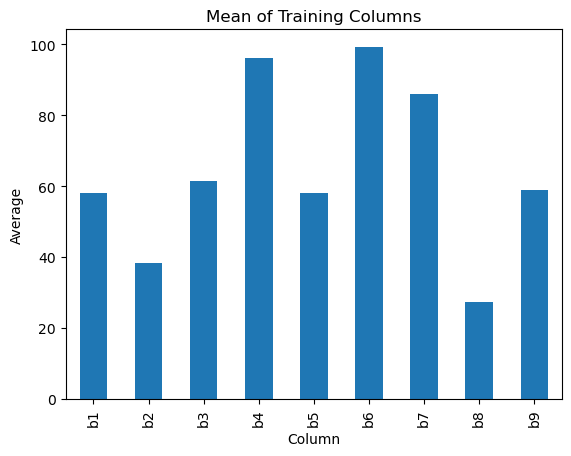

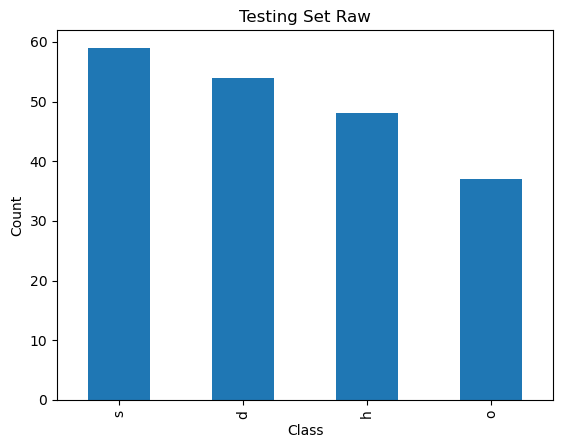

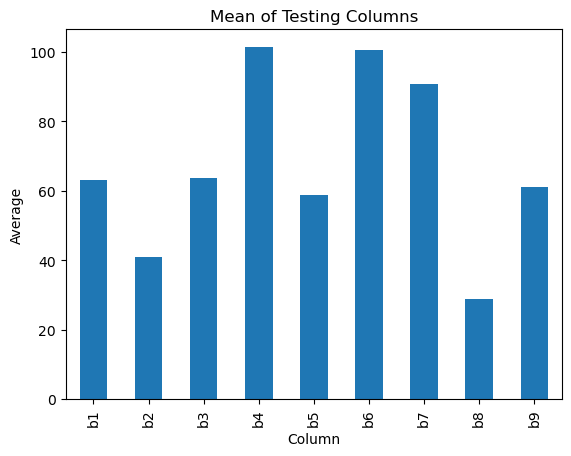

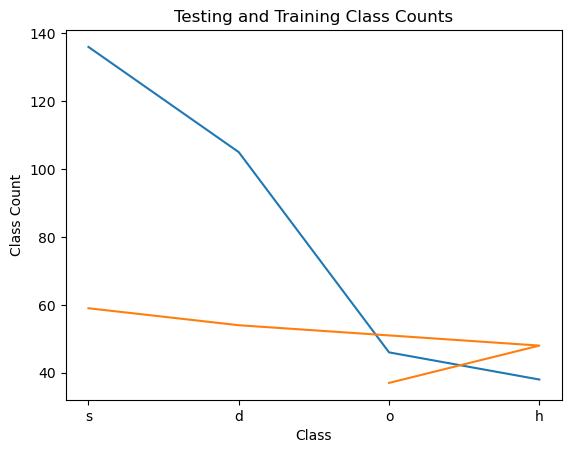

In [30]:
#plot training set class value counts
train_data["class"].value_counts().plot.bar(title ="Training Set Raw")
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

#plot training set mean of columns
train_data.drop(columns=["class"]).mean(axis = 0).plot.bar(title ="Mean of Training Columns")
plt.xlabel('Column')
plt.ylabel('Average')
plt.show()

#plot Testing set class value counts
test_data["class"].value_counts().plot.bar(title ="Testing Set Raw")
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

#plot testing set mean of columns
test_data.drop(columns=["class"]).mean(axis = 0).plot.bar(title ="Mean of Testing Columns")
plt.xlabel('Column')
plt.ylabel('Average')
plt.show()

#plotting both of the class counts ontop of eachother to see any imbalances
training_class_counts = train_data['class'].value_counts()
testing_class_counts = test_data['class'].value_counts()
plt.plot(training_class_counts, label="training class counts")
plt.plot(testing_class_counts, label="testing class counts")
plt.title("Testing and Training Class Counts")
plt.ylabel("Class Count")
plt.xlabel("Class")
plt.show()

### 1.3 Feature Scaling
---
- With both of the plots below we can clearly see the large discrepancy in the range of values that both datasets take has been reduced
- The effect of the MinMax scaling can be clearly seen here where the scaled training sets are within the range ~[0,0.4] whilst keeping the distribution the same as the pre scaled columns
- Out of interest I also used the standard scaler that gave less ideal results I would have investigated this further but I was happy with the results of the MinMax scaler

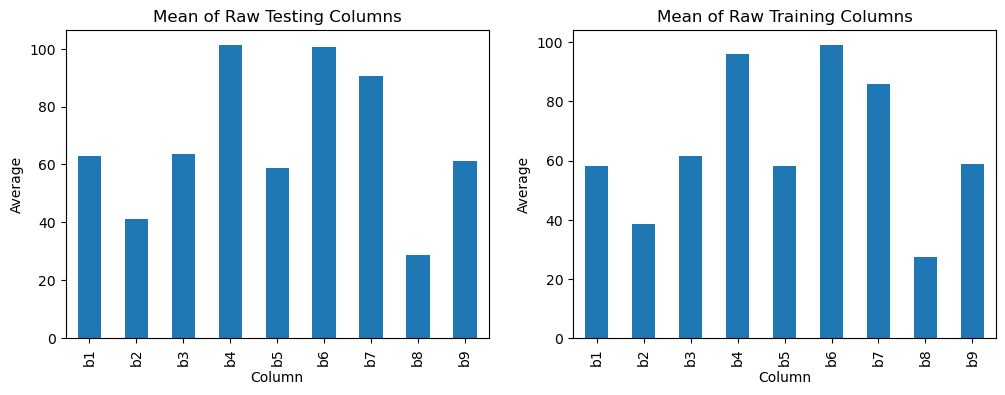

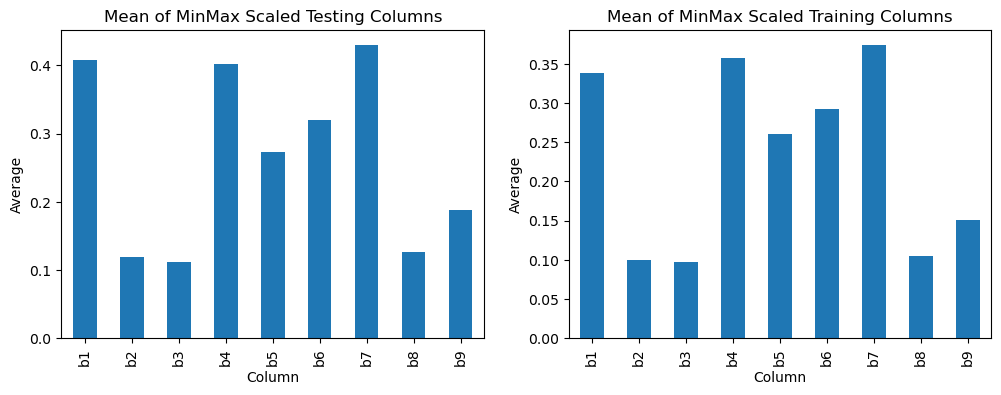

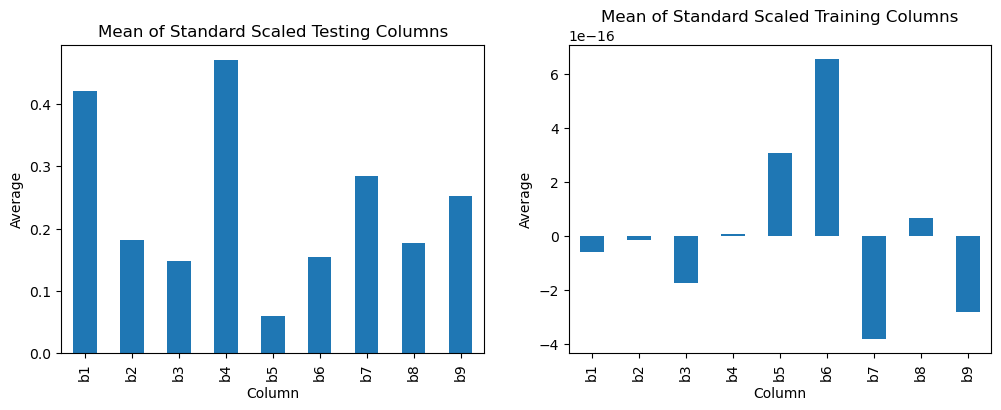

In [31]:
#apply standardscaler from sklearn to scale the imbalanced range that the features of the training and testing set can take
scaler = StandardScaler()
train_data_scaled = train_data.copy()
test_data_scaled = test_data.copy()

minmax_scaler = MinMaxScaler()
train_data_minmax = train_data.copy()
test_data_minmax = test_data.copy()

#only select from the first column so that we dont try and scale the classes column in our feature scaling
train_data_scaled.iloc[:, 1:] = scaler.fit_transform(train_data.iloc[:, 1:])
test_data_scaled.iloc[:, 1:] = scaler.transform(test_data.iloc[:, 1:])

test_data_minmax.iloc[:, 1:] = minmax_scaler.fit_transform(test_data.iloc[:, 1:])
train_data_minmax.iloc[:, 1:] = minmax_scaler.transform(train_data.iloc[:, 1:])

#plot raw and scaled features
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
test_data.drop(columns=["class"]).mean(axis = 0).plot.bar(title ="Mean of Raw Testing Columns")
plt.xlabel('Column')
plt.ylabel('Average')

plt.subplot(1, 2, 2)
train_data.drop(columns=["class"]).mean(axis = 0).plot.bar(title ="Mean of Raw Training Columns")
plt.xlabel('Column')
plt.ylabel('Average')
plt.show()

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
test_data_minmax.drop(columns=["class"]).mean(axis = 0).plot.bar(title ="Mean of MinMax Scaled Testing Columns")
plt.xlabel('Column')
plt.ylabel('Average')

plt.subplot(1, 2, 2)
train_data_minmax.drop(columns=["class"]).mean(axis = 0).plot.bar(title ="Mean of MinMax Scaled Training Columns")
plt.xlabel('Column')
plt.ylabel('Average')
plt.show()

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
test_data_scaled.drop(columns=["class"]).mean(axis = 0).plot.bar(title ="Mean of Standard Scaled Testing Columns")
plt.xlabel('Column')
plt.ylabel('Average')

plt.subplot(1, 2, 2)
train_data_scaled.drop(columns=["class"]).mean(axis = 0).plot.bar(title ="Mean of Standard Scaled Training Columns")
plt.xlabel('Column')
plt.ylabel('Average')
plt.show()




### 1.4 Logistic Regression Classifier
---
- First the feature scaled dataset is split into datasets that only contain classes 's' and 'd' or the sugi and mixed deciduous classifications
- These sd training sets are then split into x and y training sets and the logistic regression classifier is fit to the testing data
- The prediction is then extracted from the trained model and printed out and it can be seen that it perfectly predicts the expected output from the test

In [32]:
#extract classes 's' and 'd' from the dataset
train_data_sd = train_data_minmax[train_data_minmax['class'].isin(['s', 'd'])]
test_data_sd = test_data_minmax[test_data_minmax['class'].isin(['s', 'd'])]

#split data into x and y training values by splitting the trainind datas predictors and the labels into x and y sets
x_train_sd = train_data_sd.iloc[:, 1:]
y_train_sd = train_data_sd.iloc[:, 0]

#same as above but for testing
x_test_sd = test_data_sd.iloc[:, 1:]
y_test_sd = test_data_sd.iloc[:, 0]

#initialise regression object and fit it to the data
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train_sd, y_train_sd)

#predict the class of forest given the test
y_prediction = logistic_regression.predict(x_test_sd)
print(y_prediction)
print(np.array(y_test_sd))
predicted = np.array(y_prediction)
expected = np.array(y_test_sd)

# Set up the bar plot
n = len(predicted)
index = np.arange(n)
bar_width = 0.35

# Plot the bars
plt.figure(figsize=(14, 6))
plt.bar(index, predicted, bar_width, label='Predicted')
plt.bar(index + bar_width, expected, bar_width, label='Expected')

# Customize the plot
plt.xlabel('Observations')
plt.ylabel('Class')
plt.title('Predicted vs Expected Forest Cover Types')
plt.xticks(index + bar_width / 2, range(1, n+1))
plt.legend()

# Show the plot
plt.show()


['d' 's' 's' 'd' 's' 'd' 's' 's' 'd' 's' 'd' 's' 'd' 's' 'd' 'd' 'd' 'd'
 'd' 's' 's' 'd' 'd' 'd' 'd' 'd' 'd' 's' 's' 'd' 'd' 'd' 's' 'd' 's' 's'
 's' 'd' 'd' 's' 'd' 'd' 's' 's' 'd' 's' 's' 'd' 'd' 'd' 'd' 's' 'd' 's'
 's' 'd' 'd' 's' 'd' 'd' 'd' 'd' 's' 's' 's' 's' 's' 'd' 's' 's' 'd' 's'
 's' 's' 's' 's' 'd' 's' 's' 's' 's' 'd' 'd' 's' 'd' 's' 's' 'd' 'd' 's'
 'd' 's' 'd' 's' 'd' 's' 's' 'd' 's' 's' 's' 'd' 'd' 's' 's' 's' 's' 'd'
 's' 's' 's' 'd' 'd']
['d' 's' 's' 'd' 's' 'd' 's' 'd' 'd' 's' 'd' 's' 'd' 's' 'd' 'd' 'd' 'd'
 'd' 's' 's' 'd' 'd' 'd' 'd' 'd' 'd' 's' 's' 'd' 'd' 'd' 's' 'd' 's' 's'
 's' 'd' 'd' 's' 'd' 'd' 's' 's' 'd' 's' 's' 'd' 'd' 'd' 'd' 's' 'd' 's'
 's' 'd' 'd' 's' 'd' 'd' 'd' 'd' 's' 's' 's' 's' 's' 's' 's' 's' 'd' 's'
 's' 's' 's' 's' 'd' 's' 's' 's' 's' 'd' 'd' 's' 'd' 's' 's' 'd' 'd' 's'
 'd' 's' 'd' 's' 'd' 's' 's' 'd' 's' 's' 's' 'd' 'd' 's' 's' 's' 's' 'd'
 's' 's' 's' 'd' 'd']


### 1.5 Logistic Regression Classifier For Two Features
---
- Here the estimated probabilities for each class are plotted against each feature, first b1 and then b6
- It can be seen that each feature has a vastly different decision boundary and graph with the b1 feature graph having a decision boundary of just under 0.1 where as the b6 feature graph has a decision boundary of just over 0.3
- The graphs are quite different aswell with the b1 graph being strictly linear where as the b6 graph looks slightly more like the textbook example with some tapering at the ends of each line

c:\Users\Harry\miniconda3\envs\cits5508-2023\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


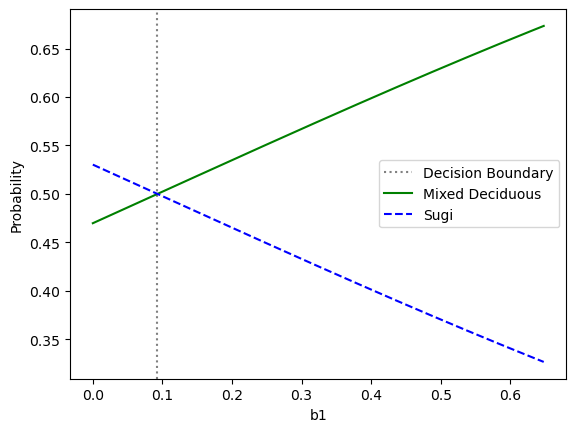

c:\Users\Harry\miniconda3\envs\cits5508-2023\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


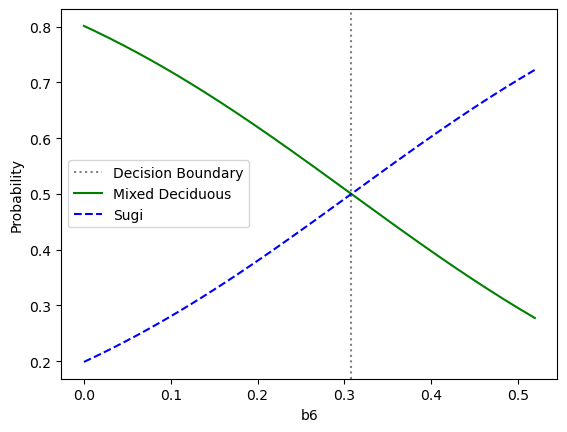

In [33]:
#function to plot estimated probabilities and decision boundary of logistic regression 
def plot_prediction_probabilities(feature, X_train, X_test, y_train):
    # Create a logistic regression model using the selected feature
    X_train_feature = X_train[[feature]]
    X_test_feature = X_test[[feature]]

    #initialise logistic regression classification object and fit to our selected features training values
    logistic_regression = LogisticRegression()
    logistic_regression.fit(X_train_feature, y_train)

    #find valid x axis range by stepping through the range of values for our feature
    X_axis_range = np.linspace(X_test_feature.min(), X_test_feature.max(), 1000).reshape(-1, 1)

    # Calculate probabilities for the selected feature
    y_predicted_probability = logistic_regression.predict_proba(X_axis_range)
    
    decision_boundary_index = np.argmin(np.abs(y_predicted_probability[:, 1] - y_predicted_probability[:, 0]))
    decision_boundary_index_x = X_axis_range[decision_boundary_index]

    # Add a dotted vertical line at the decision boundary
    plt.axvline(decision_boundary_index_x, color='grey', linestyle=':', label="Decision Boundary")

    #plot the x axis range
    plt.plot(X_axis_range, y_predicted_probability[:, 1], "g-", label="Mixed Deciduous")
    plt.plot(X_axis_range, y_predicted_probability[:, 0], "b--", label="Sugi")

    #formatting plots
    plt.xlabel(feature)
    plt.ylabel("Probability")
    plt.legend()

    plt.show()

plot_prediction_probabilities("b1", x_train_sd, x_test_sd, y_train_sd)
plot_prediction_probabilities("b6", x_train_sd, x_test_sd, y_train_sd)


### 1.6 Logistic Regression Classifier For all Features
---
- Here we do a similar process as *1.5* but including all features rather than just b1 or b6
- The logistic regression function is initialised and then fitted to the training data with all the features and then a random 10 instances are taken with the use of a seeded (with the unit number) random choice
- As can be seen in the plot a decision boundary of 50 percent is not quite adequate and a decision boundary of higher probably closer to 70 percent would be more accurate as based on the 50 percent decision boundary i would classify a sugi as mixed deciduous erroneously

[0.84839927 0.82174443 0.38371733 0.82032885 0.13726748 0.10889424
 0.12157854 0.62229858 0.33132371 0.27995626]


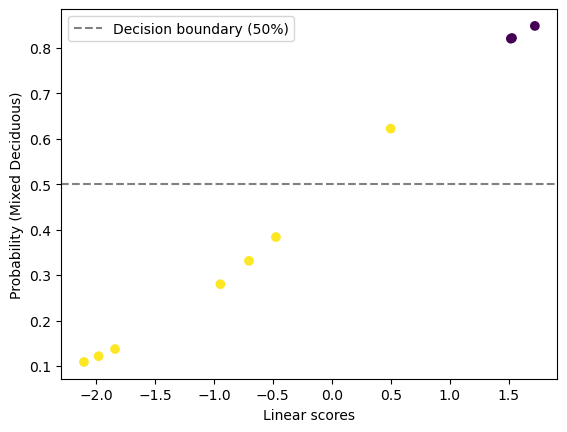

In [34]:
#fit logistic regression model with all features
log_reg_all_features = LogisticRegression()
log_reg_all_features.fit(x_train_sd, y_train_sd)

#initialise a random number generator and then select 10 random values from our dataset
np.random.seed(5508)
random_indices = np.random.choice(x_test_sd.index, size=10, replace=False)
X_test_random = x_test_sd.loc[random_indices]
y_test_random = y_test_sd.loc[random_indices]

#extract the score value from the logistic regression model for our x axis and calculate the probabilities 
scores = log_reg_all_features.decision_function(X_test_random)
probabilities = log_reg_all_features.predict_proba(X_test_random)[:, 1]
print(probabilities)

#plot probabilities and decision boundary
plt.scatter(scores, probabilities, c=y_test_random.map({"s": 0, "d": 1}))
plt.axhline(y=0.5, color='gray', linestyle='--', label="Decision boundary (50%)")
plt.xlabel("Linear scores")
plt.ylabel("Probability (Mixed Deciduous)")
plt.legend()

plt.show()

### 1.7 Precision vs Recall
---
- Plotted precision vs recall with the use of sklearns metrics class found [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html)
- Here it can be seen that the best threshold is closer to 1.0 most likely around 0.8 or 0.9 which seems to be a good mixture of recall and precision
- Interestingly if recall was not a concern than a threshold of close to 0 would result in the biggest precision

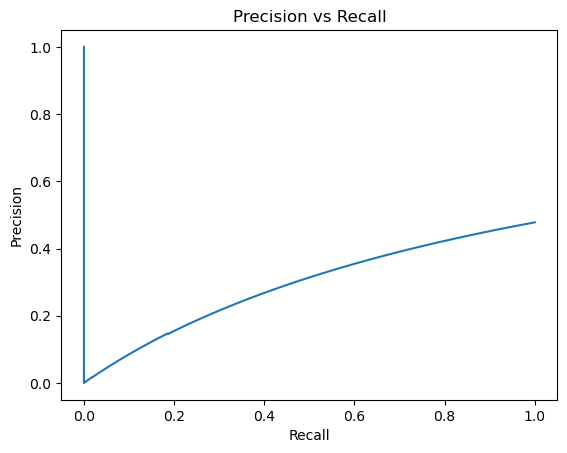

In [35]:
#extract score values
predicted_probabilities = log_reg_all_features.predict_proba(x_test_sd)[:, 1]

#calculate precision and recall using the y scores from the decision_function
precision, recall, thresholds = precision_recall_curve((y_test_sd == "d").astype(int), predicted_probabilities)

#plot the precision-recall curve
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision vs Recall")
plt.show()

### 1.8 K-NN Algorithm
---
- Here the k-nearest neighbours algorithm is used for the same binary classification as above
- I initially naievely test all k values to try and plot a graph to focus my search
- It can be seen that between 0 and 25 has the best performance so I apply another search and plot that area to try and determine the best K value
- In the final plot it can be seen that theres a tie for the best k value from around 3 through to ~12 so I chose 3 as the best k value

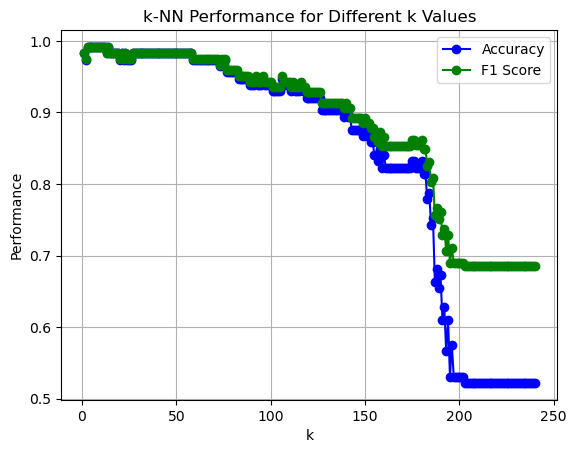

It looks like the highest scores are around the 0-25 mark so we can search this area for a more granular plot


In [36]:
#try different values of k
k_values = list(range(1, 241))

#lists so that the final vlaues can be plotted
accuracies = []
f1_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_sd, y_train_sd)
    y_pred = knn.predict(x_test_sd)
    
    accuracy = accuracy_score(y_test_sd, y_pred)
    f1 = f1_score((y_test_sd == "s").astype(int), (y_pred == "s").astype(int))
    
    accuracies.append(accuracy)
    f1_scores.append(f1)

#plot the accuracies and F1 scores for different k values
plt.plot(k_values, accuracies, "bo-", label="Accuracy")
plt.plot(k_values, f1_scores, "go-", label="F1 Score")
plt.xlabel("k")
plt.ylabel("Performance")
plt.legend()
plt.title("k-NN Performance for Different k Values")
plt.grid(True)
plt.show()
print("It looks like the highest scores are around the 0-25 mark so we can search this area for a more granular plot")

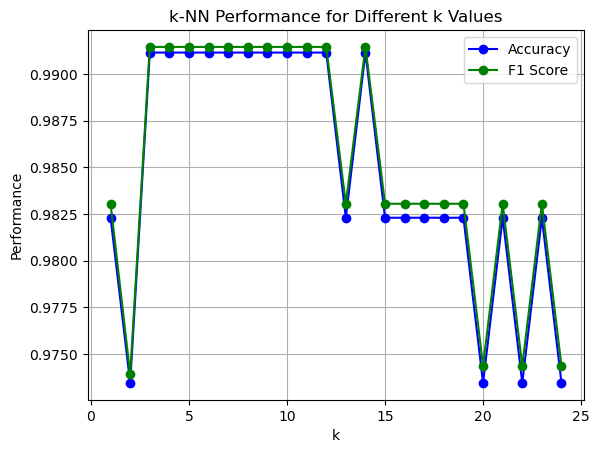

In [37]:
# Try different values of k
k_values = list(range(1, 25))
accuracies = []
f1_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_sd, y_train_sd)
    y_pred = knn.predict(x_test_sd)
    
    accuracy = accuracy_score(y_test_sd, y_pred)
    f1 = f1_score((y_test_sd == "s").astype(int), (y_pred == "s").astype(int))
    
    accuracies.append(accuracy)
    f1_scores.append(f1)

# Plot the accuracies and F1 scores for different k values
plt.plot(k_values, accuracies, "bo-", label="Accuracy")
plt.plot(k_values, f1_scores, "go-", label="F1 Score")
plt.xlabel("k")
plt.ylabel("Performance")
plt.legend()
plt.title("k-NN Performance for Different k Values")
plt.grid(True)
plt.show()

### 1.9 K-NN vs Logistic Regression
---
- Here I compare the performance of the k-NN algorithm and the linear regression algorithm
- The threshold of 0.9 was chosen for the linear regression algorithm as that had the best tradeoff between precision and recall in section *1.7*
- The accuracies, confusion matrices and ROC are plotted or printed and we can draw some comparisons between the two algorithms
- We get an interesting result where the knn algorithm has an accuracy of 1.0 and a logistic regression accuracy of ~ 0.982 therefore the knn algorithm is clearly more accurate
- I'm assuming that if the dataset was less imbalanced or I cleaned the dataset in a more rigorous manner that the knn algoirthm might preform worse

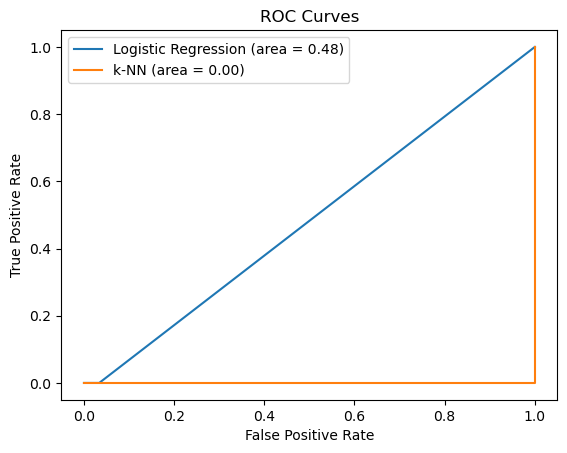

Logistic Regression Confusion Matrix: 
 [[53  1]
 [ 1 58]]

Knn Confusion Matrix: 
 [[54  0]
 [ 0 59]]

Logistic Regression Accuracy: 
 0.9823008849557522

Knn Accuracy: 
 1.0


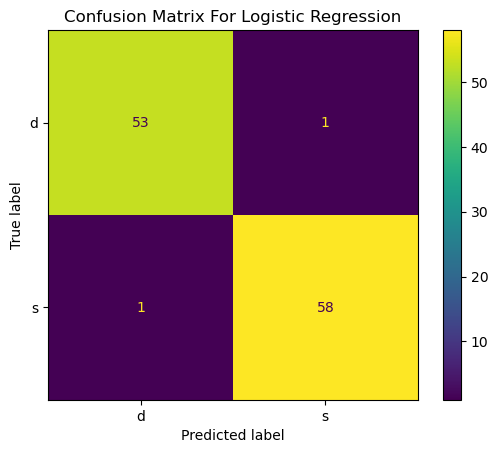

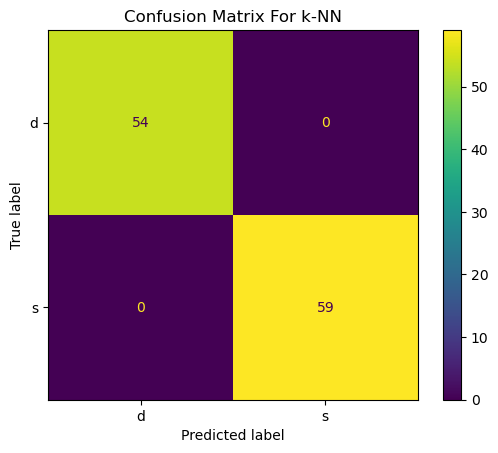

In [38]:
#logistic Regression with a threshold of 
y_pred_lr = log_reg_all_features.predict(x_test_sd)
y_probs = (log_reg_all_features.predict_proba(x_test_sd)[:, 1] > 0.9)
confusion_lr = confusion_matrix(y_test_sd, y_pred_lr)
accuracy_lr = accuracy_score(y_test_sd, y_pred_lr)
fpr_lr, tpr_lr, _ = roc_curve((y_test_sd == "d"), y_probs)  
roc_auc_lr = auc(fpr_lr, tpr_lr)

# k-NN using k from above search
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_test_sd, y_test_sd)
y_predict_knn = knn.predict(x_test_sd)
y_predict_proba_knn = knn.predict_proba(x_test_sd)[:, 1]
confusion_knn = confusion_matrix(y_test_sd, y_predict_knn)
accuracy_knn = accuracy_score(y_test_sd, y_predict_knn)
y_probs_knn = knn.predict_proba(x_test_sd)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve((y_test_sd == "d"), y_predict_proba_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC curves
plt.figure()
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (area = %0.2f)' % roc_auc_lr)
plt.plot(fpr_knn, tpr_knn, label='k-NN (area = %0.2f)' % roc_auc_knn)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()


disp_lr = ConfusionMatrixDisplay.from_predictions(y_test_sd, y_pred_lr)
disp_lr.ax_.set_title("Confusion Matrix For Logistic Regression")
disp_knn = ConfusionMatrixDisplay.from_predictions(y_test_sd, y_predict_knn)
disp_knn.ax_.set_title("Confusion Matrix For k-NN")
print("Logistic Regression Confusion Matrix: \n", confusion_lr)
print("\nKnn Confusion Matrix: \n", confusion_knn)

print("\nLogistic Regression Accuracy: \n", accuracy_lr)
print("\nKnn Accuracy: \n", accuracy_knn)

### 1.10 3-Fold Cross Validation
---
- Here I used the cross_val_score method from sklearn to compute the cross fold validation scores across both algorithms
- It can be seen that once again the k-NN algorithm is better as across the 3 folds it scores higher

In [39]:
#logistic regression cross val score with 3 folds
logreg_cv_scores = cross_val_score(log_reg_all_features, x_train_sd, y_train_sd, cv=3)

#k-NN with the ideal k value found in 1.8 and 3 folds
knn_cv_scores = cross_val_score(knn, x_train_sd, y_train_sd, cv=3)

print("Logistic Regression CV score:", logreg_cv_scores)
print("k-NN CV score:", knn_cv_scores)

Logistic Regression CV score: [0.88888889 0.925      0.85      ]
k-NN CV score: [0.92592593 0.9375     0.875     ]


## 2.0 Multiclass Classification
---
Utilising the Support Vector Machine Classifier from sklearn.svm.SVC, SoftmaxRegression and the k-NN algorithm. All algorithms are implemented and their results compared

### 2.1 SVMC using the one-versus-one strategy
---
- The two parameters I chose to optimise with a gridsearch was 'C' the cost or regularisation parameter and gamma, the kernel coefficient I used a logspace to gridsearch these values as when I used an arange it took over 5 minutes to complete the girdsearch and reading the documentation [here](https://scikit-learn.org/stable/modules/grid_search.html) suggested to use a logspace. This worked much faster and resulted in the optimal parameters printed below
- All other hyperparameters were left at default values as from my limited experimentation they had a marginal affect on the accuracy
- The optimal parameters that in combination caused the highest classification accuracy were ~890 for the cost parameter and ~0.0266 for the gamma coefficient which resulted in an accuracy of ~0.892 as can be seen in the print below

In [40]:
#split scaled data into x and y datasets including all classes
x_train_allclass = train_data_minmax.iloc[:, 1:]
y_train_allclass = train_data_minmax.iloc[:, 0]

x_test_allclass = test_data_minmax.iloc[:, 1:]
y_test_allclass = test_data_minmax.iloc[:, 0]


#setup parameter grid using logspace from x^-4 to x^4
param_grid = {
    'C': np.logspace(-4, 4, 100),
    'gamma': np.logspace(-4, 4, 100),
}

#create a SVC model with the one-vs-one strategy
svm = SVC(decision_function_shape='ovo')

#create and pass required parameters to gridsearch
grid_search = GridSearchCV(svm, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

#fit the gridsearch to the all class inclusive training data
grid_search.fit(x_train_allclass, y_train_allclass)

#extract the best accuracy score and parameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best hyperparameters:", best_params)
print("Best accuracy:", best_score)

Best hyperparameters: {'C': 890.2150854450392, 'gamma': 0.026560877829466867}
Best accuracy: 0.8923150979725903


### 2.2 Softmax Regression vs k-NN vs SVM
---
- I got an accuracy of ~ 0.864 for the softmax regression, interestingly whenever I increased 'C' the accuracy seemed to go up but I didnt have the time to look into this further and optimise for the best cost parameter
- I searched through 100 different values of k for the k-NN algorithm and found the best value to be equal to 6 with an accuracy of ~0.924
- I fitted the SVM model with the best parameters found in the grid search in *2.1* giving me an accuracy of ~0.892
- Based off of my results the k-NN model has the highest classification accuracy 

Softmax Regression accuracy: 0.8636363636363636
SVM accuracy: 0.8939393939393939
Best K accuracy: 0.9242424242424242 For k = 6


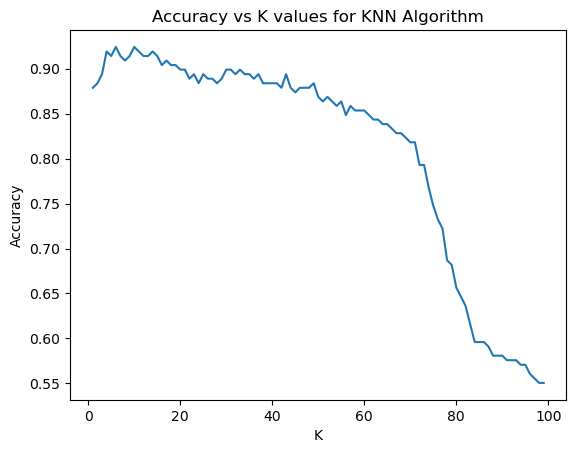

In [41]:
#train Softmax Regression
softmax_reg = LogisticRegression(multi_class="multinomial")
softmax_reg.fit(x_train_allclass, y_train_allclass)
y_pred_softmax = softmax_reg.predict(x_test_allclass)
softmax_accuracy = accuracy_score(y_test_allclass, y_pred_softmax)

# Train k-NN for different values of k
k_values = list(range(1, 100, 1))
knn_accuracies = []
best_k = 0
best_accuracy_k = 0

#same search as sections above
for k in k_values:
    knn_allclass = KNeighborsClassifier(n_neighbors=k)
    knn_allclass.fit(x_train_allclass, y_train_allclass)
    y_pred_knn = knn_allclass.predict(x_test_allclass)
    knn_accuracy = accuracy_score(y_test_allclass, y_pred_knn)
    if knn_accuracy > best_accuracy_k:
        best_accuracy_k = knn_accuracy
        best_k = k
    knn_accuracies.append(knn_accuracy)

# Train SVM with the best hyperparameters found using GridSearchCV
svm_best = SVC(decision_function_shape='ovo', C=best_params['C'], gamma=best_params['gamma'])
svm_best.fit(x_train_allclass, y_train_allclass)
y_pred_svm = svm_best.predict(x_test_allclass)
svm_accuracy = accuracy_score(y_test_allclass, y_pred_svm)

# Display results
print("Softmax Regression accuracy:", softmax_accuracy)
print("SVM accuracy:", svm_accuracy)
print("Best K accuracy:", max(knn_accuracies), "For k =", best_k)

plt.plot(k_values, knn_accuracies)
plt.title("Accuracy vs K values for KNN Algorithm")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.show()

## 3.0 k-nearest neighbours for regression
---
- Exploring the k-NN algorithm for regression
- Exploring the affects of different weights and feature selection on RMSE of the k-NN regression algorithm

### 3.1 data loading, preprocessing and imports
---
- Here I've imported the necessary classes and functions and the data
- After the data is imported I've utilised the textbooks data cleaning and preparing function to both clean up the dataset and also standardise with sklearns standard scaler
- The data is then split into an 80-20 training testing set split using sklearns training_test_split function

In [42]:
#imports
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

#load data and preview columns to ensure no errors
housing_df = pd.read_csv("housing.csv")

#code from the textbook to clean the data and prepare for the model
housing = housing_df.drop("median_house_value", axis=1)
housing_labels = housing_df["median_house_value"].copy()

housing.dropna(subset=["total_bedrooms"])

housing_num = housing.drop("ocean_proximity", axis=1)

imputer = SimpleImputer(strategy="median")

imputer.fit(housing_num)

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

num_pipeline = Pipeline([
 ('imputer', SimpleImputer(strategy="median")),
 ('attribs_adder', CombinedAttributesAdder()),
 ('std_scaler', StandardScaler()),
 ])

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
 ("num", num_pipeline, num_attribs),
 ("cat", OneHotEncoder(), cat_attribs),
 ])
housing_prepared = full_pipeline.fit_transform(housing)

#split the cleaned predictors (housing_prepared) and features (housing_labels) into x and y training sets with 80 percent in the training and 20 percent in the testing
x_train_set, x_test_set, y_train_set, y_test_set = train_test_split(housing_prepared, housing_labels, test_size=0.2, random_state=5508)




### 3.2 k-NN Regressor
---
- Using the knn regressor with our standardised and cleaned data to predict house prices
- We get a massive RMSE of ~60417.61, I suspect we will be able to improve this with feature selection and some optimisation though, I also suspect that I might have not fully understood the data cleaning code and have messed something up

In [43]:
#initialise the knn_regressor with k=3 and fit it to the training set
knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(x_train_set, y_train_set)

#extract the predicted house price from the test set
y_pred = knn_regressor.predict(x_test_set)

#calculate RMSE from the sklearn function and print it
rmse = (mean_squared_error(y_test_set, y_pred, squared=False))
print("Root Mean Square Error (RMSE):", rmse)

Root Mean Square Error (RMSE): 63846.82585038812


### 3.3 Selection of Columns for Feature Vectors
---
- I naively selected [latitude, longitude], [bedrooms] and [population, median_income, housing_median_age] as my selected features
- As can be seen in the plot below the [latitude, longitude] had by far the best RMSE value of ~52858.63 whilst the other features selected had a much worse RMSE, I suspect that with a gridsearch of all possible features we could find the best combination of features to use 

RMSE for features= ['latitude', 'longitude'] 52858.6250271989
RMSE for features= ['total_bedrooms'] 126530.4685498569
RMSE for features= ['population', 'median_income', 'housing_median_age'] 84017.6461690101


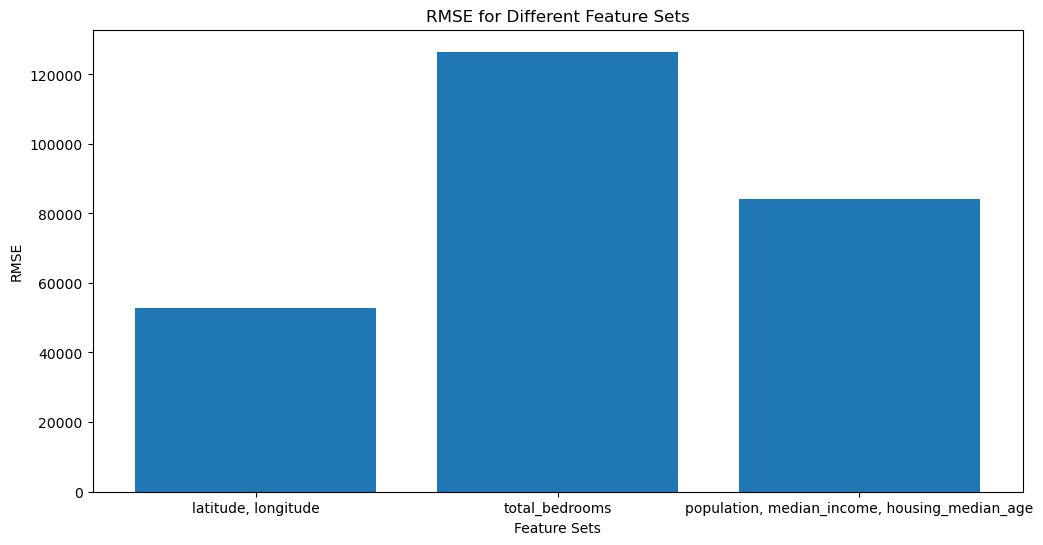

In [44]:
#intialise the feature combinations I want to explore
feature_combinations = [
    ['latitude', 'longitude'],
    ['total_bedrooms'],
    ['population', 'median_income', 'housing_median_age']
]

#list to keep track of the uniform values to plot later
rmse_values_uniform = []

for features in feature_combinations:
    # Get the indices of the selected features
    feature_indices = [housing.columns.get_loc(feature) for feature in features]

    # Select only the specified features from the training and testing sets
    x_train_subset = x_train_set[:, feature_indices]
    x_test_subset = x_test_set[:, feature_indices]

    # Train the k-NN regressor using the specified features and weights
    knn_regressor = KNeighborsRegressor(n_neighbors= 5)
    knn_regressor.fit(x_train_subset, y_train_set)

    y_test_pred = knn_regressor.predict(x_test_subset)

    rmse = mean_squared_error(y_test_set, y_test_pred, squared=False)
    rmse_values_uniform.append(rmse)
    print(f"RMSE for features=", features, rmse)

#plot the results
plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_combinations)), rmse_values_uniform)
plt.xticks(range(len(feature_combinations)), [', '.join(features) for features in feature_combinations])
plt.xlabel('Feature Sets')
plt.ylabel('RMSE')
plt.title('RMSE for Different Feature Sets')
plt.show()

### 3.4 changing weights parameter
---
- Here i take the same approach as above but investigate the affect of using the distance weight instead of the default uniform weight that was used in *3.3*
- As can be seen in the plot below where both the distance and uniform RMSE are plotted the uniform weighting preformes slightly better in all feature combinations, if I had a more exhuastive list of features it might be more compelling


RMSE for features with distance weight= ['latitude', 'longitude'] 54065.3406617748
RMSE for features with uniform weight= ['latitude', 'longitude'] 52858.6250271989
RMSE for features with distance weight= ['total_bedrooms'] 128590.29591838334
RMSE for features with uniform weight= ['total_bedrooms'] 126530.4685498569
RMSE for features with distance weight= ['population', 'median_income', 'housing_median_age'] 85271.09100621488
RMSE for features with uniform weight= ['population', 'median_income', 'housing_median_age'] 84017.6461690101


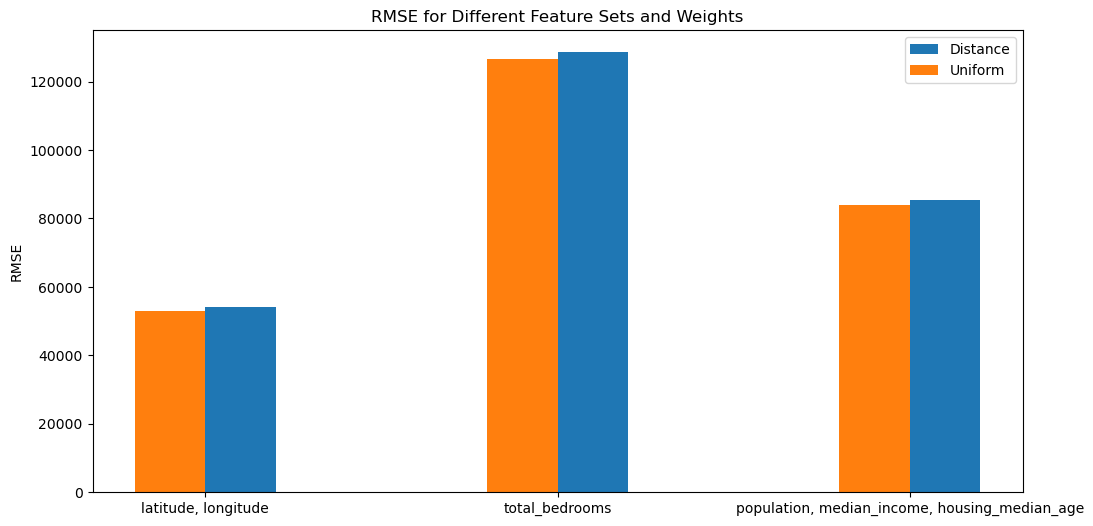

In [45]:
#specify combinations of features
feature_combinations = [
    ['latitude', 'longitude'],
    ['total_bedrooms'],
    ['population', 'median_income', 'housing_median_age']
]

#list to hold all of the rmse values so that they can be plotted
rmse_values_distance = []

for index, features in enumerate(feature_combinations):
    # Get the indices of the selected features
    feature_indices = [housing.columns.get_loc(feature) for feature in features]

    # Select only the specified features from the training and testing sets
    x_train_subset = x_train_set[:, feature_indices]
    x_test_subset = x_test_set[:, feature_indices]

    # Train the k-NN regressor using the specified features and weights
    knn_regressor = KNeighborsRegressor(n_neighbors= 5, weights="distance")
    knn_regressor.fit(x_train_subset, y_train_set)

    y_test_pred = knn_regressor.predict(x_test_subset)

    rmse = mean_squared_error(y_test_set, y_test_pred, squared=False)
    rmse_values_distance.append(rmse)
    
    print("RMSE for features with distance weight=", features, rmse)
    print("RMSE for features with uniform weight=", features ,rmse_values_uniform[index])
    
#plot the results

x_positions = np.arange(len(feature_combinations))
plt.figure(figsize=(12, 6))
plt.bar(x_positions + 0.2 / 2, rmse_values_distance, width=0.2, label='Distance')
plt.bar(x_positions - 0.2 / 2, rmse_values_uniform, width=0.2, label='Uniform')
plt.xticks(x_positions, [', '.join(features) for features in feature_combinations])
plt.ylabel('RMSE')
plt.title('RMSE for Different Feature Sets and Weights')
plt.legend()
plt.show()



### 3.5 Discussion
---
- There is a small but noticeable improvement in the root mean squared error of the k-NN algorithm that uses the uniform weighting rather than distance weighting
- It's clear that there is some optimisation still left on the table as I haven't optimised the k value for the k-NN equation and I could optimise the combination of features to find an even better RMSE
- I think with better data cleaning and maybe a Min-Max scaling technique instead of the standard scaling I could have potentially gotten better results
